# Relatório

OBS: Antes de começar a esmiuçar a base de dados, foram feitos uma pré-análise dos dados utilizando o pivot table do Excel, e também a biblioteca ydata-profiling sendo assim, já iniciei a exploração via python com objetivos fixados. Também foram feitas outras análises via Python que foram removidas, por não demonstrarem nada relevante para a exploração.

**Exploratory Data Analysis (EDA)**

Correlação entre Matérias-Primas e Preços:

- Não foi identificada uma relação direta entre o tipo de matéria-prima base, o tipo de grupo principal e os valores finais do produto. As médias e medianas são próximas, e o grande valor de desvio padrão sugere que não há uma correlação forte entre as variáveis analisadas e o preço final do produto.

Correlação entre Matérias-Primas e Matéria-Prima Base do Produto:

- Foi analisada a correlação entre o tipo de matéria-prima base, o grupo primário e a matéria-prima usada na composição do produto. Foi possível identificar os tipos de matéria-prima base e grupo primário mais presentes nos dados e compreender melhor como essas variáveis se relacionam com a matéria-prima usada na composição dos produtos. Observou-se uma correlação entre o valor final do produto e a quantidade total ou "concentração" de matéria-prima utilizada.

Conclusão

- A análise realizada sugere que a quantidade total ou concentração de matéria-prima utilizada tem uma correlação com o valor final do produto, enquanto o tipo específico de matéria-prima base e grupo primário não parecem ter uma influência direta nos preços finais. Essas informações podem ser úteis para otimizar a produção e os custos dos produtos, focando na eficiência da utilização das matérias-primas disponíveis.

## Exportação dos dados

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Desativando todos os warnings
warnings.filterwarnings("ignore")
# Configuração pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Configuração pandas para nao mostrar notação cientifica para numeros
pd.set_option ('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Acessando meu drive via google collab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importanto a base de dados do meu drive
data = '/content/drive/MyDrive/dados/basf/case_basf.csv'
df = pd.read_csv(data)

In [ ]:
df.head(5)

,Produto,Paleta,ProdutoOrigem,UF-R,TIPO MP BASE,Embalagem (volume),Código cor,Grupo Principal,Sub-Grupo,L1,M1,N2,O3,P8,D9,H0,Z5,Preço Final
0,12929305,7,Tinta Suvinil Fosco Completo,1 - N/NE,J,16,1Y- 25,Y,1Y,0,0,0,5,5,0,0,10,"R$ 615,00"
1,12927973,7,Tinta Suvinil Fosco Completo,1 - N/NE,J,16,1Y-R92,Y,1Y,0,0,10,0,0,0,0,20,"R$ 738,00"
2,12928800,7,Tinta Suvinil Fosco Completo,1 - N/NE,J,16,0R-I50,R,0R,0,0,0,0,10,0,0,10,"R$ 633,00"
3,12927917,7,Tinta Suvinil Fosco Completo,1 - N/NE,J,16,0Y-O08,Y,0Y,0,0,0,10,0,0,0,10,"R$ 696,00"
4,817653,7,Tinta Suvinil Fosco Completo,1 - N/NE,J,16,0Y-A93,Y,0Y,0,20,0,0,0,0,15,5,"R$ 898,00"


In [ ]:
# Renomeando colunas, isso facilitará nosso acesso e navegação aos dados
column_names = ['product', 'palette', 'origin_product',
                'uf_r', 'type_fs_base', 'volume',
                'code_collor', 'principal_group',
                'subgroup', 'L1', 'M1', 'N2', 'O3',
                'P8', 'D9', 'H0', 'Z5', 'final_price']

df.columns = column_names

In [ ]:
df.columns

Index(['product', 'palette', 'origin_product', 'uf_r', 'type_fs_base',
       'volume', 'code_collor', 'principal_group', 'subgroup', 'L1', 'M1',
       'N2', 'O3', 'P8', 'D9', 'H0', 'Z5', 'final_price'],
      dtype='object')

In [ ]:
df.shape

(1368, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product          1368 non-null   int64  
 1   palette          1368 non-null   int64  
 2   origin_product   1368 non-null   object 
 3   uf_r             1368 non-null   object 
 4   type_fs_base     1368 non-null   object 
 5   volume           1368 non-null   int64  
 6   code_collor      1368 non-null   object 
 7   principal_group  1368 non-null   object 
 8   subgroup         1368 non-null   object 
 9   L1               1368 non-null   int64  
 10  M1               1368 non-null   int64  
 11  N2               1368 non-null   int64  
 12  O3               1368 non-null   int64  
 13  P8               1368 non-null   int64  
 14  D9               1368 non-null   int64  
 15  H0               1368 non-null   int64  
 16  Z5               1368 non-null   int64  
 17  final_price   

## Transformação dos dados (Feature engineering)

In [ ]:
# Separando a coluna final_price para transformando-a em numérica
df['final_price_n'] = df['final_price'].str.replace(r'[^\d,]', '', regex=True)
df['final_price_n'] = df['final_price_n'].str.replace(',', '.').astype(float)

In [ ]:
df.describe()

,product,palette,volume,L1,M1,N2,O3,P8,D9,H0,Z5,final_price_n
count,1368.00,1368.00,1368.00,1368.00,1368.00,1368.00,1368.00,1368.00,1368.00,1368.00,1368.00,1368.00
mean,9877992.42,7.00,16.00,28.53,10.76,13.93,25.62,4.21,1.95,8.53,10.71,1210.39
std,5253384.04,0.00,0.00,67.43,38.27,48.27,63.08,17.17,13.57,43.10,30.81,459.56
min,815975.00,7.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,136.00
25%,1954911.00,7.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,833.00
50%,12927987.50,7.00,16.00,10.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,1120.50
75%,12928636.25,7.00,16.00,25.00,5.00,10.00,25.00,0.00,0.00,0.00,10.00,1621.00
max,12929380.00,7.00,16.00,650.00,330.00,365.00,1310.00,195.00,150.00,570.00,460.00,1998.00


Para realizar a verificação de valores ausentes, será utilizado modulos importados

Os módulos a seguir foram criados durante o curso de Formação Analista de Dados (FADA) da Data Science Academy com auxilio do professor em video aula

Os módulos se tratam de técnicas de tratamento de dados que podem ser reutilizadas em diferentes casos e análises, sendo necessária somente a importação do mesmo

A seguir segue a descrição de cada módulo

valores_ausentes.py -
- identifica a porcentagem de valores ausentes
- diversas funções com técnicas de tratamentos dos valores ausentes, sendo elas:
    - imputação (bfill, ffill, media e mediana)
    - drop de linhas ou colunas

conversao.py - Modulos de conversão dos tipos de dados para
- data
- string
- int64
- fator

outliers.py -
- identifica a porcentagem de outliers
- realiza o tratamento desses outliers (podendo ser o drop/exclusão dos mesmos, ou replace/modificação)


In [ ]:
# Importando modulos de análise de dados.
import sys
sys.path.append('/content/drive/MyDrive/dados//')

from conversao import *
from outliers import *
from valores_ausentes import *

In [ ]:
# Verificando se há valores ausentes na base de dados
func_calc_percentual_valores_ausentes(df)

O dataset tem 0.0 % de valores ausentes.


In [ ]:
df.type_fs_base.value_counts()

type_fs_base
K    924
Q    223
J    221
Name: count, dtype: int64

## EDA - Exploratory Data Analysis

In [ ]:
# Verificando se o tipo de matéria-prima tem correlação com o valor final
df.groupby('type_fs_base')['final_price_n'].describe()

,count,mean,std,min,25%,50%,75%,max
type_fs_base,,,,,,,,
J,221.0,1260.314480,450.748112,136.0,841.500,1364.0,1646.00,1996.0
K,924.0,1179.950216,458.224693,136.0,812.125,1085.5,1592.25,1998.0
Q,223.0,1287.038117,462.477494,223.5,854.750,1411.0,1678.00,1993.0


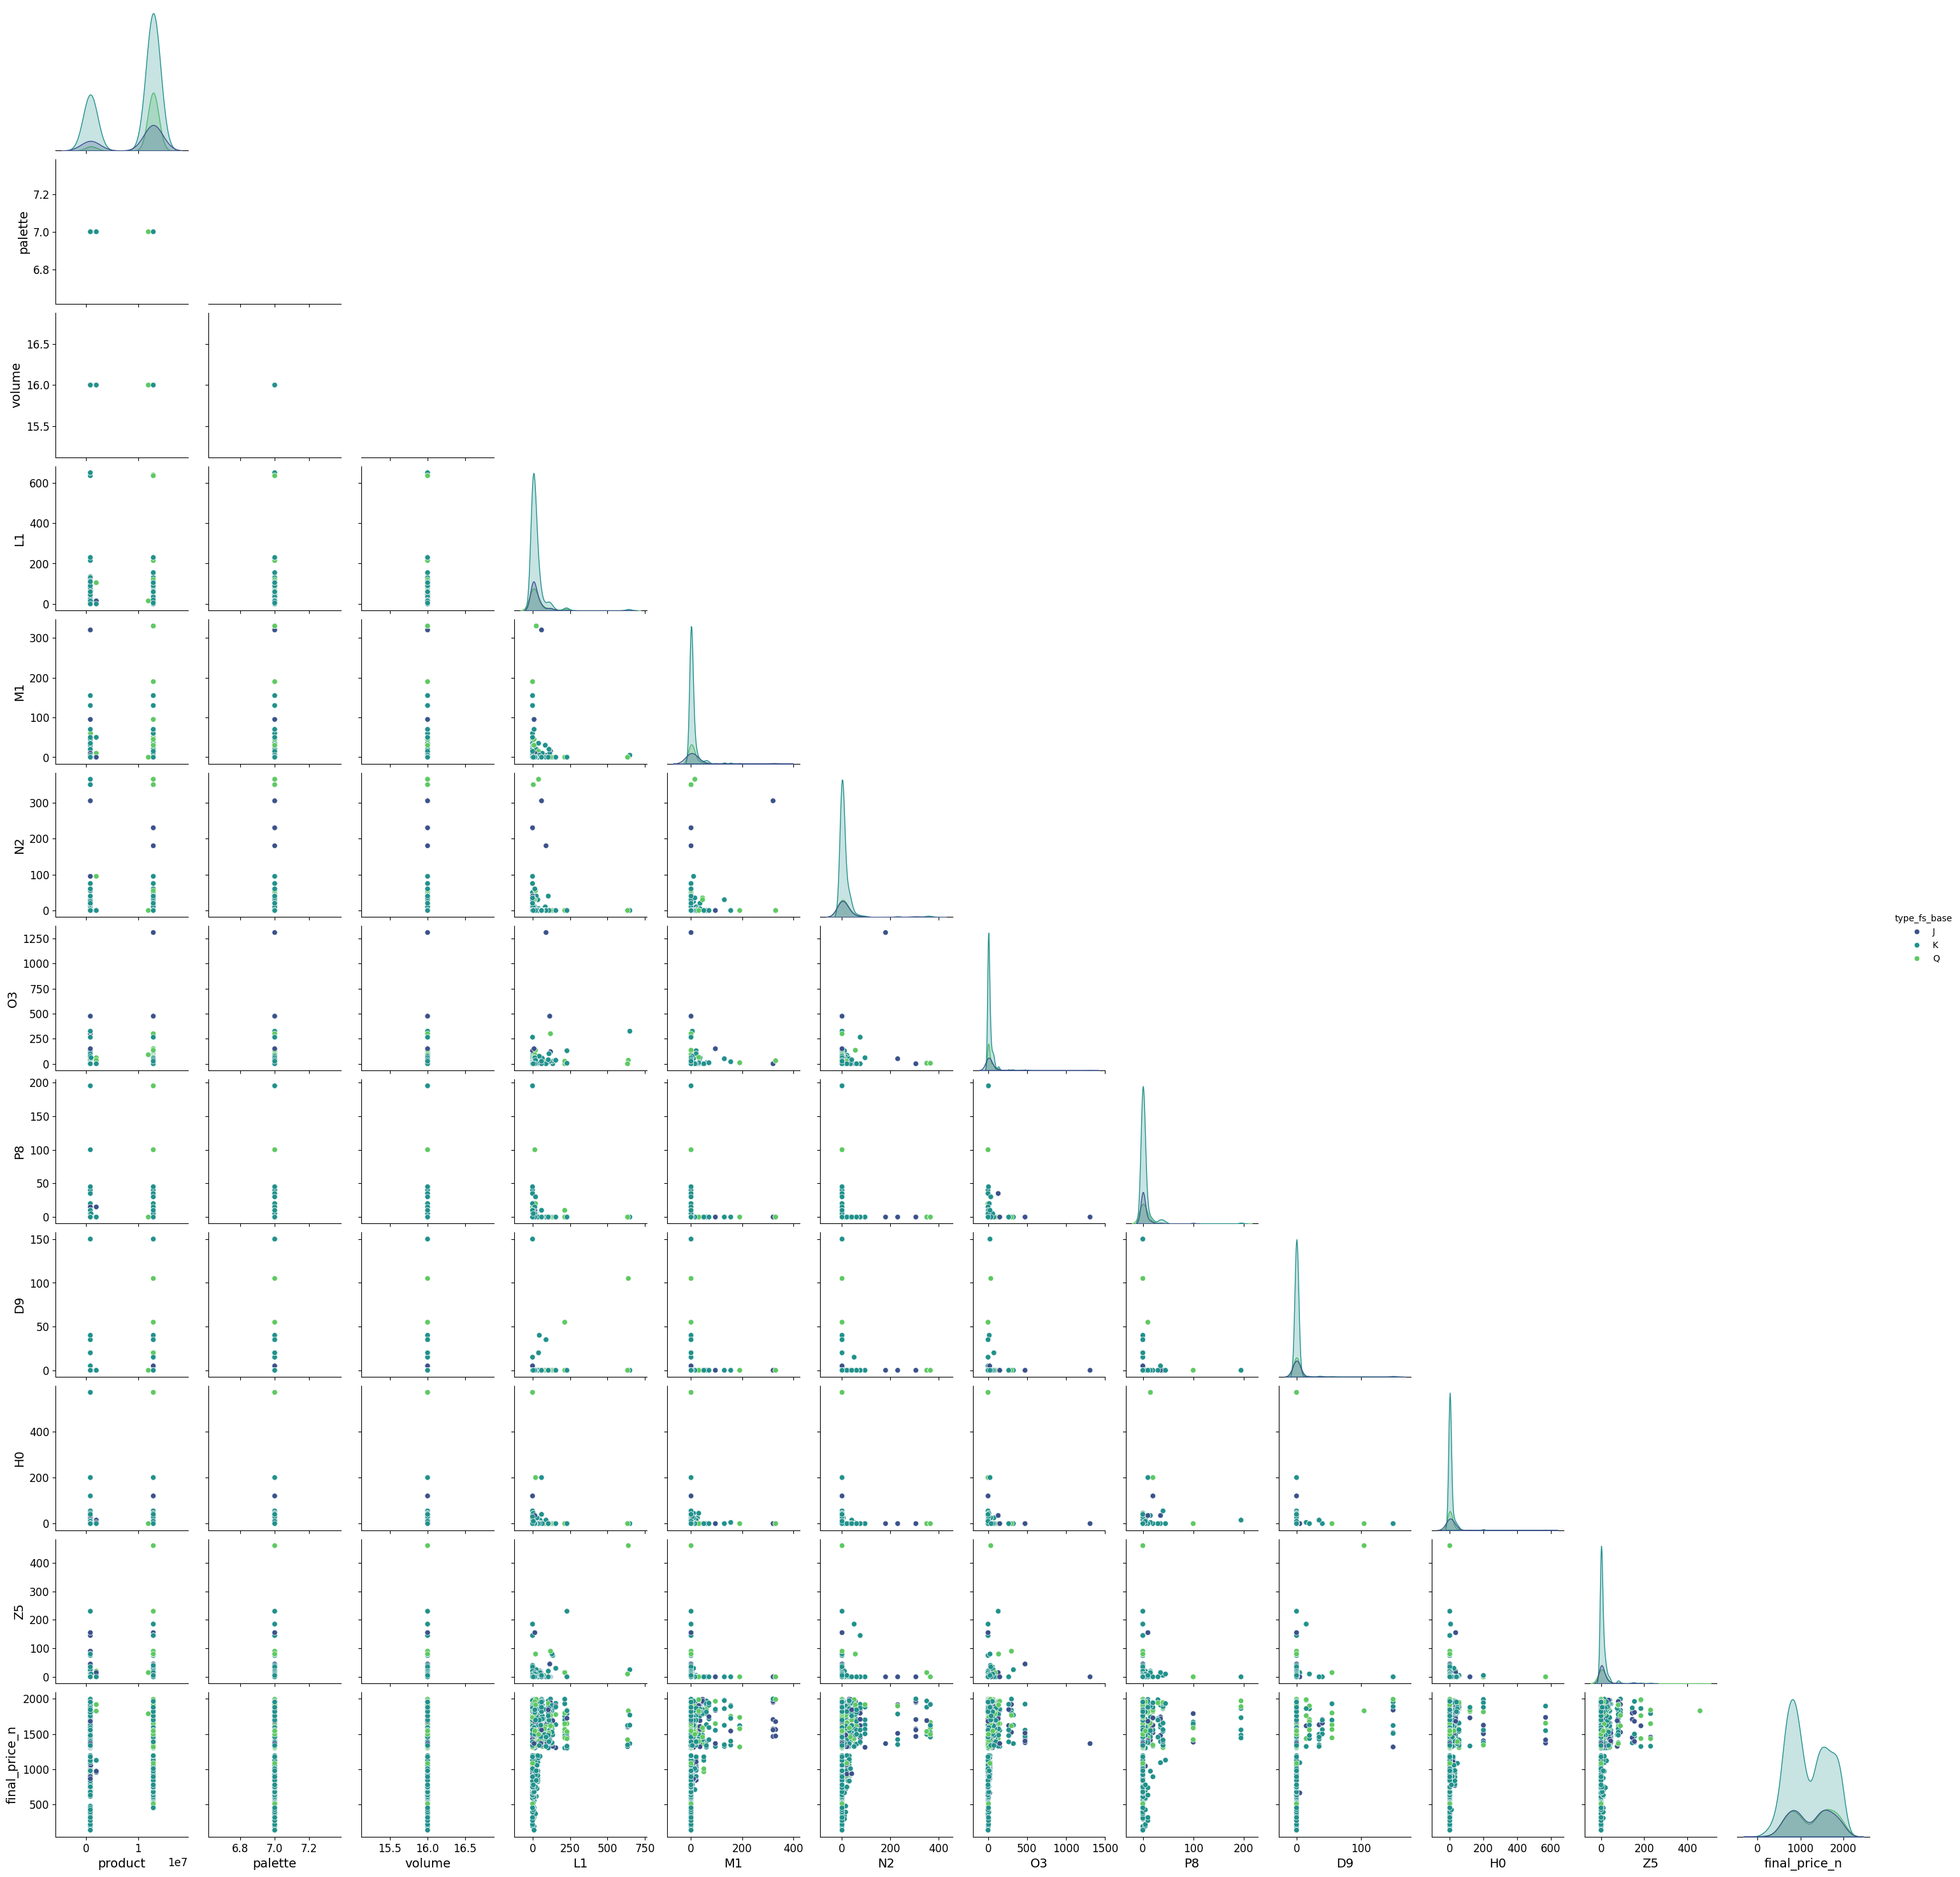

In [ ]:
sns.pairplot(df, diag_kind='kde', hue='type_fs_base', palette='viridis', corner=True)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.show()

### Entendendo a correlação entre as matérias-primas e os preços

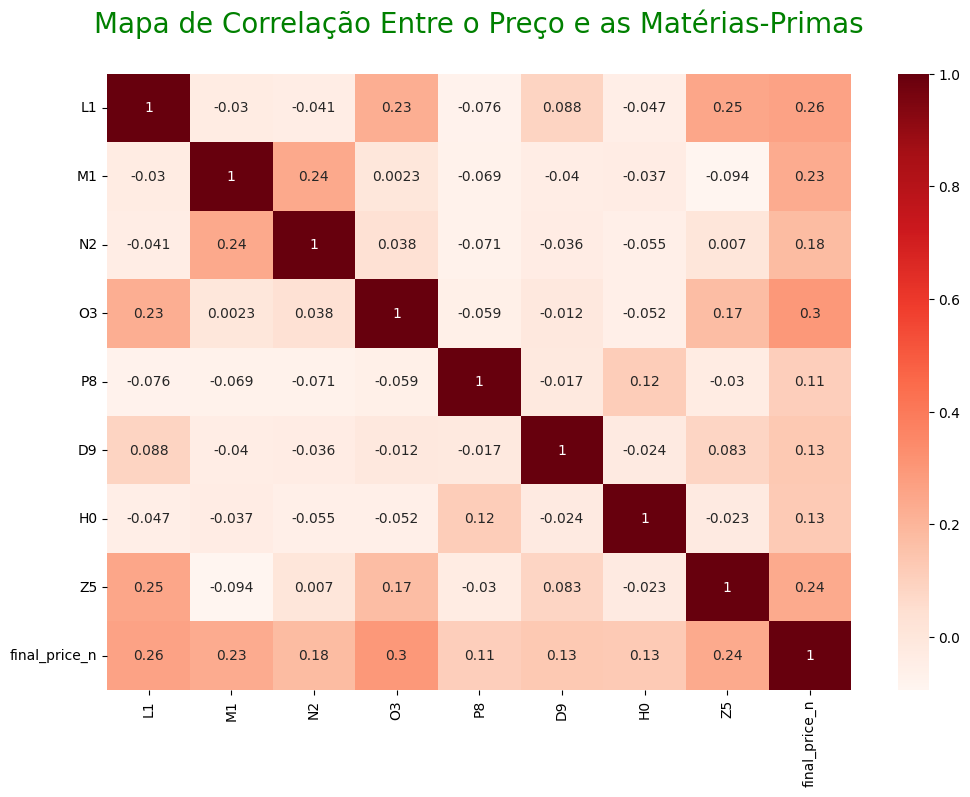

In [ ]:
# Selecionando apenas as colunas numéricas
df_numeric = df.select_dtypes(include='number').drop(['product', 'palette', 'volume'], axis=1)

# Calculando a matriz de correlação
cm = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap = "Reds")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Correlação Entre o Preço e as Matérias-Primas\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [ ]:
col_fs = [col for col in df.columns if len(col) == 2]
col_fs

['L1', 'M1', 'N2', 'O3', 'P8', 'D9', 'H0', 'Z5']

In [ ]:
df.groupby('type_fs_base')[col_fs].mean().reset_index()

,type_fs_base,L1,M1,N2,O3,P8,D9,H0,Z5
0,J,26.38,21.06,21.20,38.42,3.71,2.87,16.97,13.80
1,K,26.92,8.17,11.13,22.45,4.04,1.48,6.53,8.72
2,Q,37.38,11.30,18.32,26.05,5.45,2.98,8.48,15.90


In [ ]:
df.groupby('principal_group')['final_price_n'].describe().reset_index()

,principal_group,count,mean,std,min,25%,50%,75%,max
0,B,292.00,1200.33,466.27,136.00,833.00,1084.50,1646.75,1994.00
1,G,223.00,1275.05,434.99,453.00,869.75,1362.00,1631.50,1992.00
2,N,6.00,1363.75,445.32,865.00,1072.88,1232.75,1685.50,1996.00
3,R,247.00,1141.04,464.42,188.50,738.00,972.50,1574.50,1981.00
4,Y,600.00,1218.27,460.55,136.00,833.00,1154.00,1621.50,1998.00


In [ ]:
col_fs = [col for col in df.columns if len(col) == 2]
col_fs

['L1', 'M1', 'N2', 'O3', 'P8', 'D9', 'H0', 'Z5']

Dentro dessa análise, não foi possível encontrar uma relação direta entre o **Tipo de Matéria-Prima Base**, e o **Tipo de Grupo Principal** com os **Valores Finais** do produto. As médias e medianas são bem próximas, e nota-se um grande valor de desvio padrão, subentendendo que não há uma correlação forte (não são fatores tão impactantes) entre as variáveis análisadas e o preço final do produto.

### Entendendo a correlação entre as matérias-primas e a matéria-prima base do produto




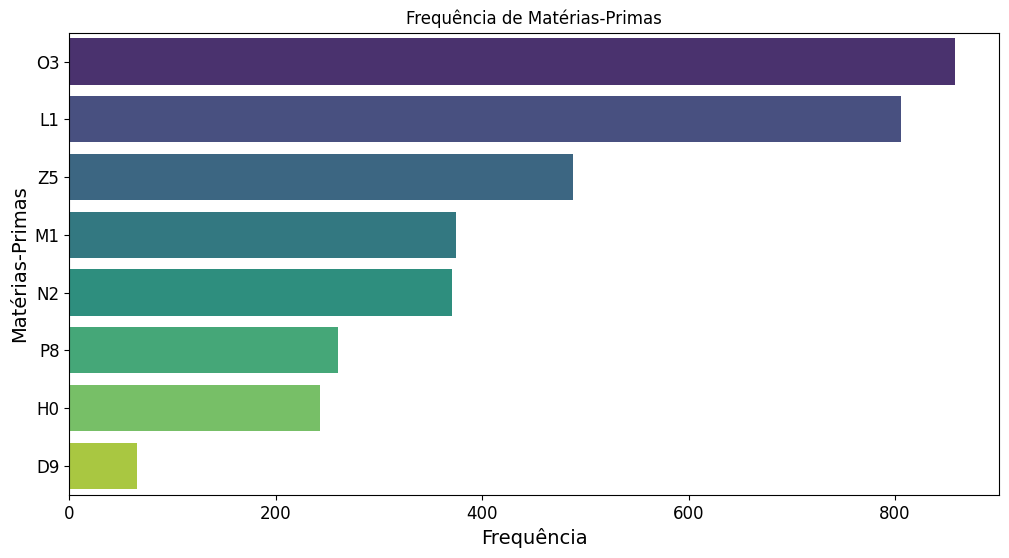

In [ ]:
df_copy = df.copy()

# Substituindo valores vazios por NaN
df_copy[col_fs] = df[col_fs].replace(0, np.nan)

# Contando quantas vezes cada valor numérico é maior que 1 em cada coluna
counts = df_copy[col_fs].gt(1).sum()

# Ordenando pelo valor de contagem de forma decrescente
counts = counts.sort_values(ascending=False)

# Criando o gráfico de contagem
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.values, y=counts.index, palette='viridis')
plt.xlabel('Frequência')
plt.ylabel('Matérias-Primas')
plt.title('Frequência de Matérias-Primas')
plt.show()


<Figure size 1600x800 with 0 Axes>

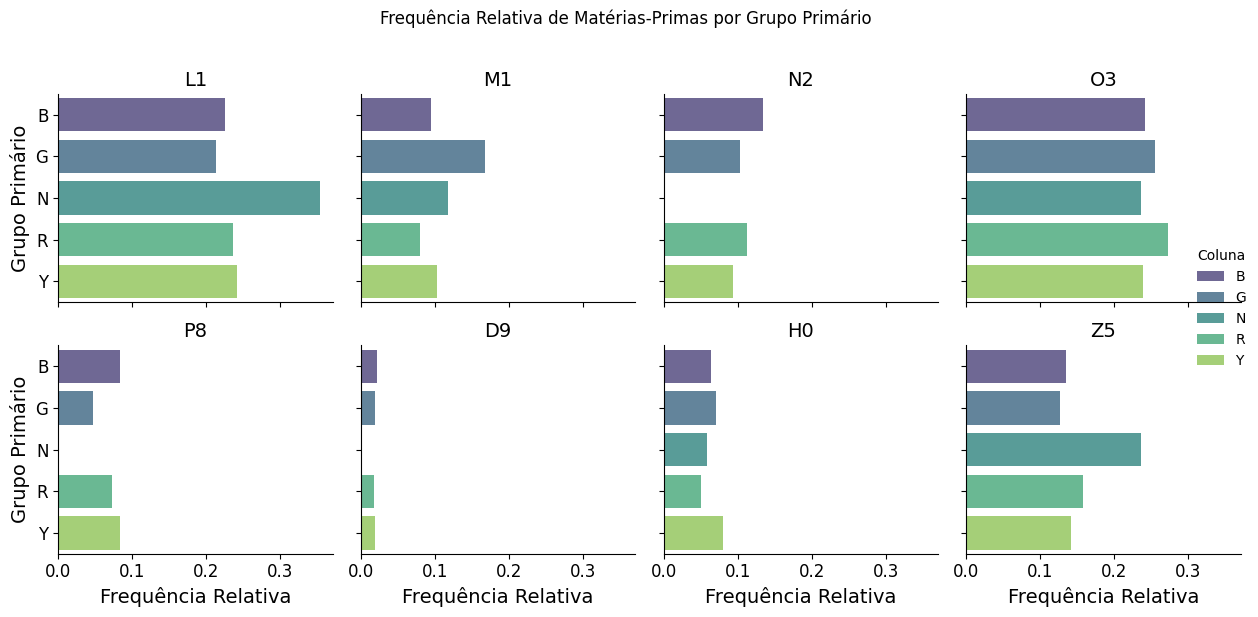

In [ ]:
# Calculando a frequência relativa para cada grupo primario
freq_counts_total = df_copy.groupby('principal_group')[col_fs].apply(lambda x: x.gt(1).sum()).reset_index()
total_values = freq_counts_total[col_fs].sum(axis=1)
freq_rel = freq_counts_total[col_fs].div(total_values, axis=0)

freq_rel['principal_group'] = freq_counts_total['principal_group']

# Transformando os dados para o formato adequado para o gráfico
df_melted = pd.melt(freq_rel, id_vars=['principal_group'], var_name='Coluna', value_name='Frequência Relativa')

# Plot
plt.figure(figsize=(16, 8))
g = sns.FacetGrid(df_melted, col="Coluna", hue="principal_group", palette='viridis', col_wrap=4)
g.map(sns.barplot, "Frequência Relativa", 'principal_group', alpha=0.8)
g.set_axis_labels("Frequência Relativa", "Grupo Primário")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Frequência Relativa de Matérias-Primas por Grupo Primário', y=1.02)
g.add_legend(title='Coluna')

plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

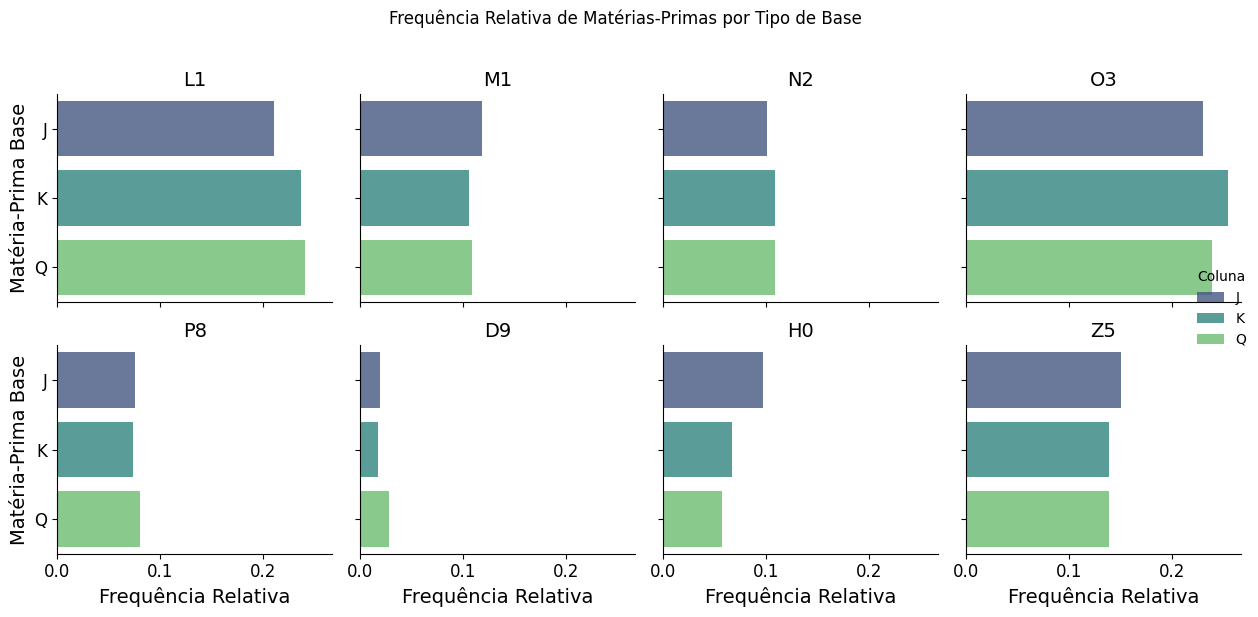

In [ ]:
freq_counts_total = df_copy.groupby('type_fs_base')[col_fs].apply(lambda x: x.gt(1).sum()).reset_index()
total_values = freq_counts_total[col_fs].sum(axis=1)
freq_rel = freq_counts_total[col_fs].div(total_values, axis=0)

freq_rel['type_fs_base'] = freq_counts_total['type_fs_base']

# Transformando os dados para o formato \adq para o gráfico
df_melted = pd.melt(freq_rel, id_vars=['type_fs_base'], var_name='Coluna', value_name='Frequência Relativa')

# Plot
plt.figure(figsize=(16, 8))

# Use g.map para criar gráficos de barras horizontais
g = sns.FacetGrid(df_melted, col="Coluna", hue="type_fs_base", palette='viridis', col_wrap=4)
g.map(sns.barplot, "Frequência Relativa", 'type_fs_base', alpha=0.8)

# Ajusta os rótulos e o título
g.set_axis_labels("Frequência Relativa", "Matéria-Prima Base")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Frequência Relativa de Matérias-Primas por Tipo de Base', y=1.02)

# Adiciona legenda
g.add_legend(title='Coluna')

plt.tight_layout()
plt.show()

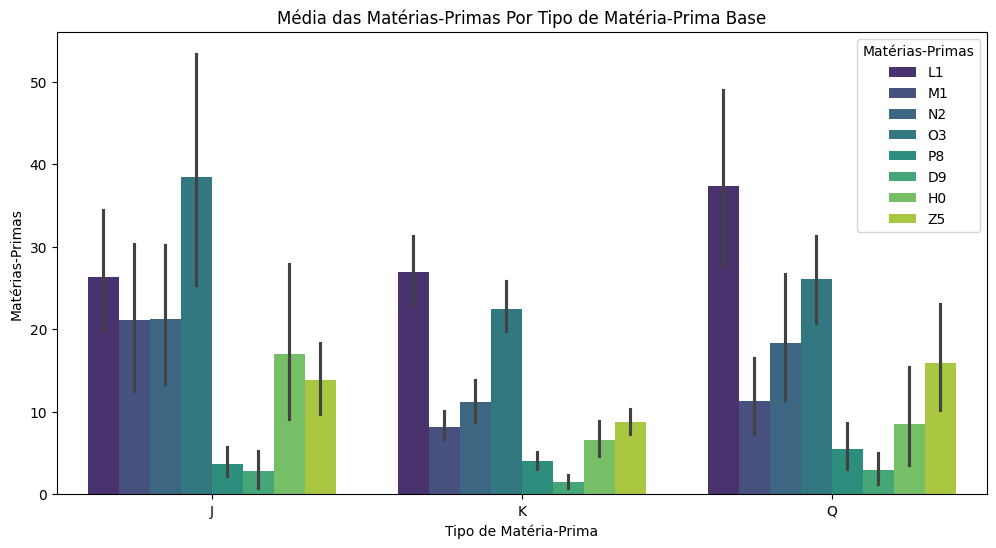

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando as colunas de matéria-prima
col_fs = [col for col in df.columns if len(col) == 2]

df_melted = pd.melt(df, id_vars=['type_fs_base'], value_vars=col_fs, var_name='Coluna', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='type_fs_base', y='Valor', hue='Coluna', palette='viridis')
plt.xlabel('Tipo de Matéria-Prima')
plt.ylabel('Matérias-Primas')
plt.title('Média das Matérias-Primas Por Tipo de Matéria-Prima Base')
plt.legend(title='Matérias-Primas')
plt.show()


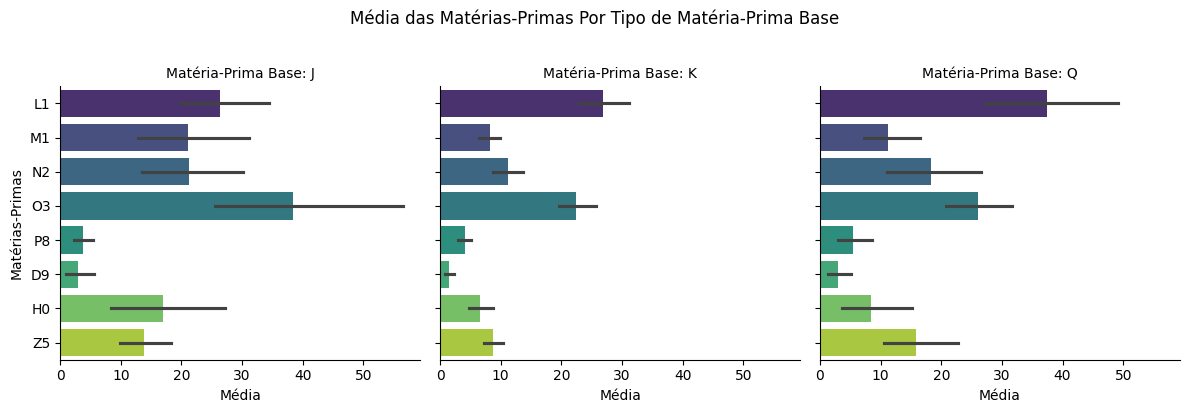

In [ ]:
# Outra forma de apresentar
g = sns.FacetGrid(df_melted, col='type_fs_base', col_wrap=3, height=4)
g.map(sns.barplot, 'Valor', 'Coluna', palette='viridis')
g.set_titles("Matéria-Prima Base: {col_name}")
g.set_axis_labels('Média', 'Matérias-Primas')
g.fig.suptitle('Média das Matérias-Primas Por Tipo de Matéria-Prima Base', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
df['sum_fs'] = df[col_fs].sum(axis=1)


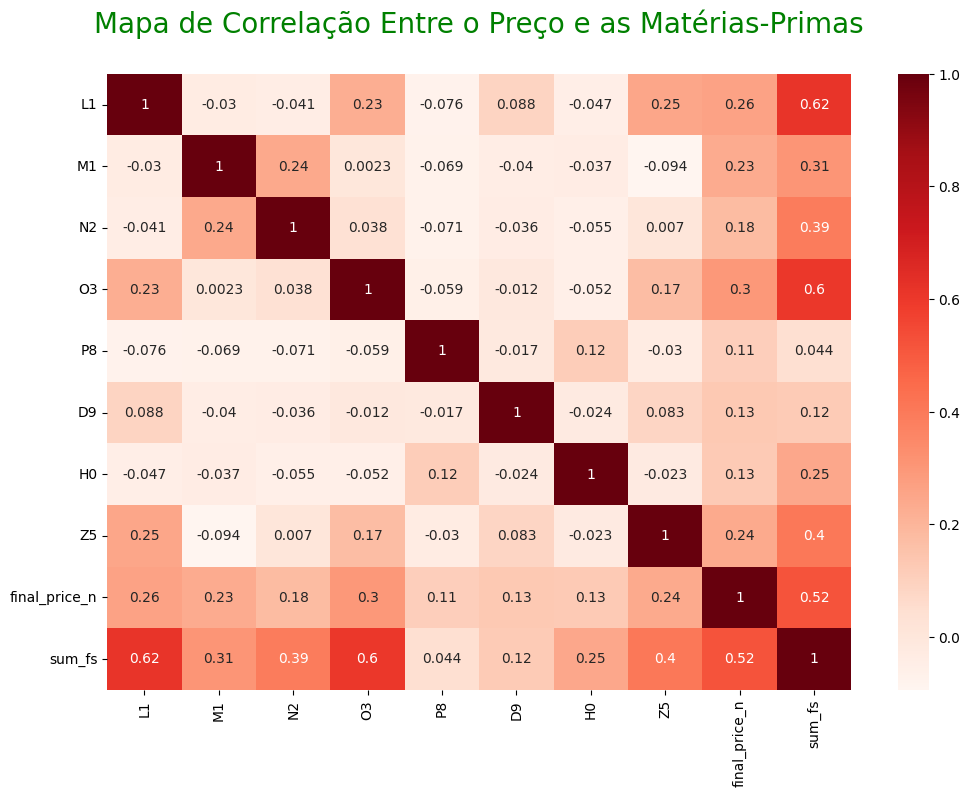

In [ ]:
# Selecionando apenas as colunas numéricas
df_numeric = df.select_dtypes(include='number').drop(['product', 'palette', 'volume'], axis=1)

# Calculando a matriz de correlação
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = "Reds")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Correlação Entre o Preço e as Matérias-Primas\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

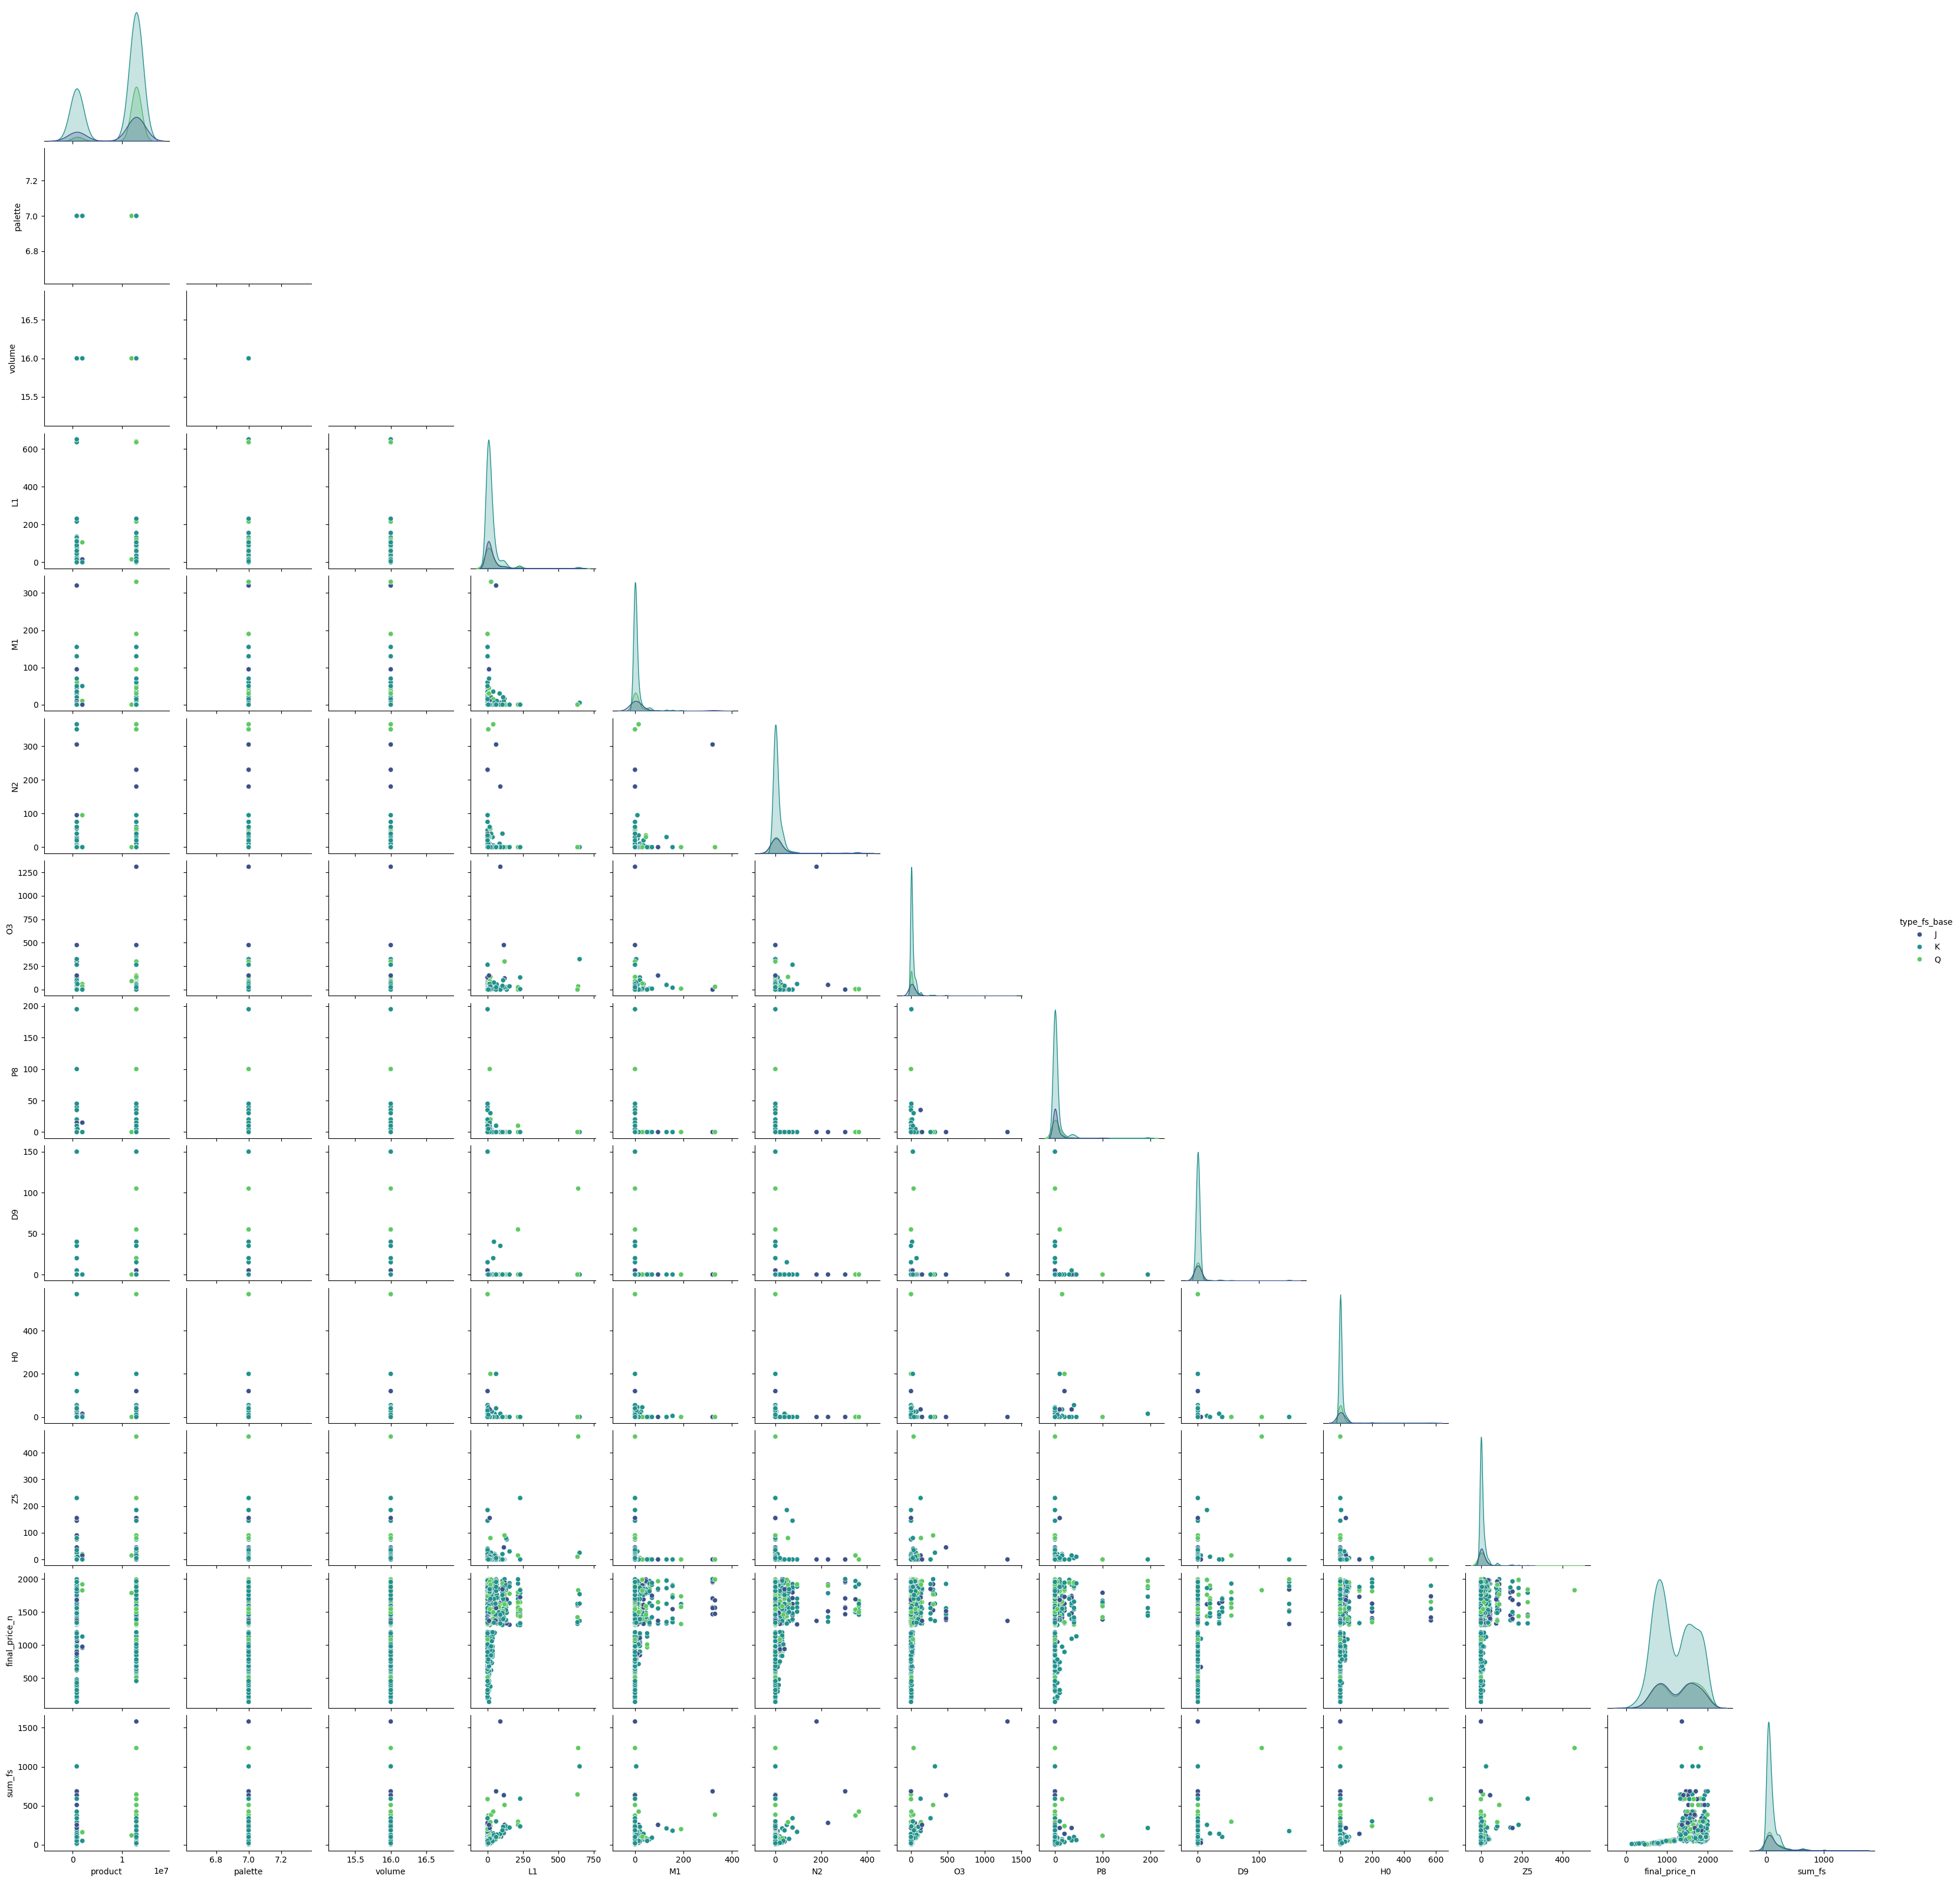

In [ ]:
sns.pairplot(df, diag_kind='kde', hue='type_fs_base', palette='viridis', corner=True)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.show()

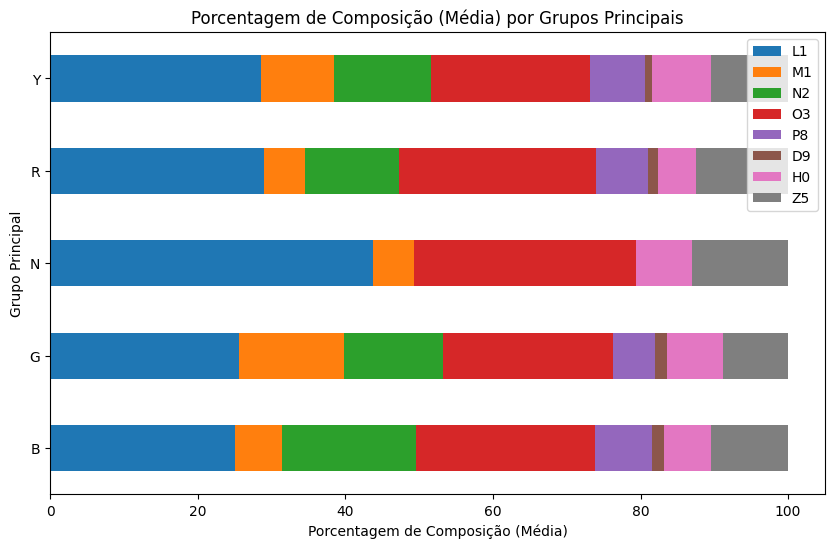

In [ ]:
normalizacao = df[col_fs].div(df[col_fs].sum(axis=1), axis=0) * 100

percent = normalizacao.groupby(df['principal_group']).mean()

percent.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Porcentagem de Composição (Média)')
plt.ylabel('Grupo Principal')
plt.title('Porcentagem de Composição (Média) por Grupos Principais')
plt.show()


Dentro dessa análise, tentou-se entender se hávia alguma correlação entre ao **Tipo de Matéria-Prima Base** e o **Grupo Primário** com a **Matéria-Prima** usada na composição do produto, afim de entender melhor e buscar otimizar a produção dos mesmos. Além de determinar quais **Tipo de Matéria-Prima Base** e **Grupo Primário** mais presentes nos dados (que estou supondo que seja uma tabela de vendas) foi possível entender melhor como essas variáveis se relacionam com a **Matéria-Prima** usada na composição dos mesmos. Notou-se que há uma correlação do **Valor Final** do produto e a **Quantidade total ou "Concentração" de Matéria-Prima** utilizada.


In [ ]:
df.groupby('type_fs_base')['principal_group'].value_counts()

type_fs_base  principal_group
J             Y                   99
              R                   52
              B                   36
              G                   33
              N                    1
K             Y                  417
              B                  209
              G                  152
              R                  142
              N                    4
Q             Y                   84
              R                   53
              B                   47
              G                   38
              N                    1
Name: count, dtype: int64

### Há alguma diferença quando se desconsidera a matéria-prima que não é usada? e quando o total de matéria prima usada é superio a 300?

In [ ]:
df[col_fs] = df[col_fs].replace(0, np.nan)

In [ ]:
# Dados das matérias-primas quando desconsiderado o 0
df.describe()

,product,palette,volume,L1,M1,N2,O3,P8,D9,H0,Z5,final_price_n,sum_fs
count,1368.00,1368.00,1368.00,806.00,375.00,371.00,858.00,260.00,66.00,243.00,488.00,1368.00,1368.00
mean,9877992.42,7.00,16.00,48.43,39.27,51.35,40.84,22.17,40.38,48.02,30.03,1210.39,104.25
std,5253384.04,0.00,0.00,82.20,65.04,81.75,75.67,34.00,47.94,92.67,45.64,459.56,136.04
min,815975.00,7.00,16.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,136.00,5.00
25%,1954911.00,7.00,16.00,10.00,10.00,15.00,10.00,5.00,5.00,15.00,10.00,833.00,30.00
50%,12927987.50,7.00,16.00,25.00,15.00,30.00,20.00,10.00,20.00,25.00,15.00,1120.50,55.00
75%,12928636.25,7.00,16.00,50.00,35.00,40.00,50.00,20.00,51.25,37.50,25.00,1621.00,120.00
max,12929380.00,7.00,16.00,650.00,330.00,365.00,1310.00,195.00,150.00,570.00,460.00,1998.00,1580.00


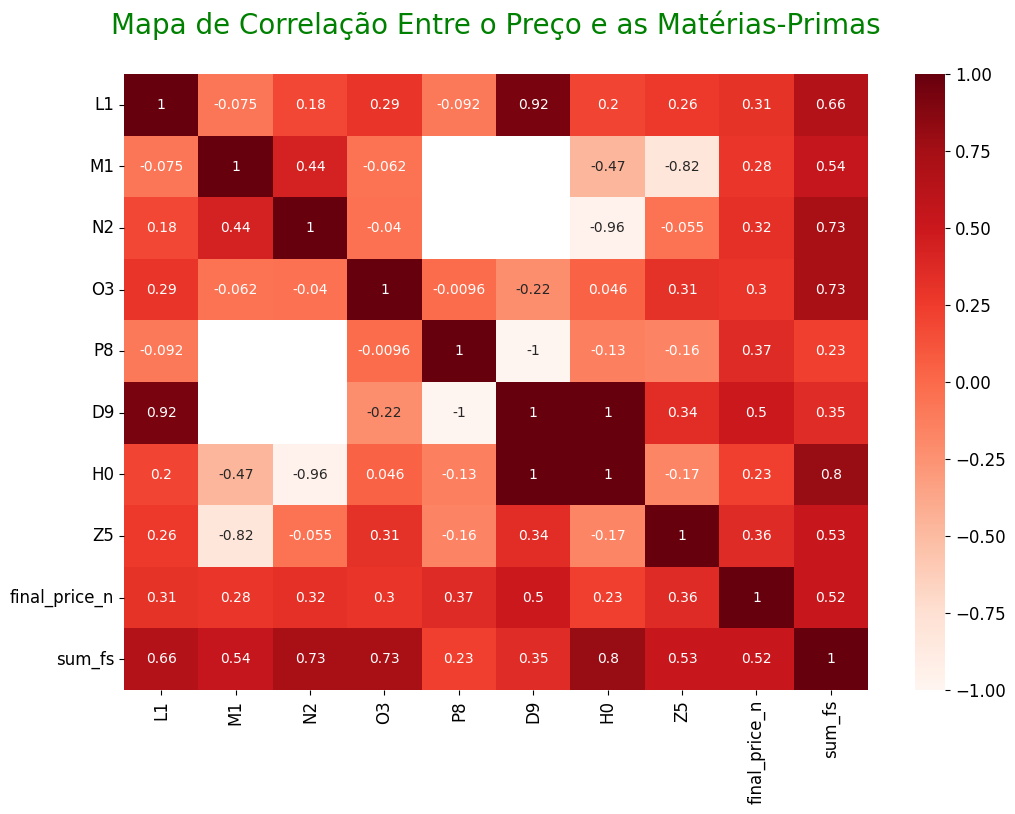

In [ ]:
# Selecionando apenas as colunas numéricas
df_numeric = df.select_dtypes(include='number').drop(['product', 'palette', 'volume'], axis=1)

# Calculando a matriz de correlação
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = "Reds")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Correlação Entre o Preço e as Matérias-Primas\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [ ]:
df.head()
df = df.fillna(0)

In [ ]:
df_filtered = df[(df[col_fs] > 300).any(axis=1)]

In [ ]:
df_filtered.head(24)

,product,palette,origin_product,uf_r,type_fs_base,volume,code_collor,principal_group,subgroup,L1,M1,N2,O3,P8,D9,H0,Z5,final_price,final_price_n,sum_fs
15,817399,7,Tinta Suvinil Fosco Completo,1 - N/NE,J,16,7Y-27,Y,7Y,60.00,320.00,305.00,0.00,0.00,0.00,0.00,0.00,"R$ 1.705,00",1705.00,685.00
16,817837,7,Tinta Suvinil Fosco Completo,1 - N/NE,J,16,0Y-E05,Y,0Y,115.00,0.00,0.00,475.00,0.00,0.00,0.00,45.00,"R$ 1.377,00",1377.00,635.00
18,12929137,7,Tinta Suvinil Fosco Completo,1 - N/NE,J,16,4Y-E21,Y,4Y,25.00,330.00,0.00,30.00,0.00,0.00,0.00,0.00,"R$ 1.986,00",1986.00,385.00
66,12928508,7,Tinta Suvinil Fosco Completo,1 - N/NE,K,16,9B- 76,B,9B,25.00,330.00,0.00,30.00,0.00,0.00,0.00,0.00,"R$ 1.570,00",1570.00,385.00
86,817686,7,Tinta Suvinil Fosco Completo,1 - N/NE,J,16,0Y-C01,Y,0Y,60.00,320.00,305.00,0.00,0.00,0.00,0.00,0.00,"R$ 1.465,00",1465.00,685.00
124,816904,7,Tinta Suvinil Fosco Completo,1 - N/NE,K,16,0Y-75,Y,0Y,40.00,15.00,365.00,5.00,0.00,0.00,0.00,0.00,"R$ 1.457,00",1457.00,425.00
145,12927727,7,Tinta Suvinil Fosco Completo,1 - N/NE,Q,16,0Y-R27,Y,0Y,5.00,0.00,350.00,5.00,0.00,0.00,0.00,15.00,"R$ 1.495,00",1495.00,375.00
167,817505,7,Tinta Suvinil Fosco Completo,10 - S,J,16,0B-N96,B,0B,60.00,320.00,305.00,0.00,0.00,0.00,0.00,0.00,"R$ 1.949,00",1949.00,685.00
168,817956,7,Tinta Suvinil Fosco Completo,10 - S,J,16,7Y-42,Y,7Y,0.00,0.00,0.00,0.00,15.00,0.00,570.00,0.00,"R$ 1.736,00",1736.00,585.00
216,816446,7,Tinta Suvinil Fosco Completo,10 - S,K,16,0Y-F94,Y,0Y,5.00,0.00,350.00,5.00,0.00,0.00,0.00,15.00,"R$ 1.496,00",1496.00,375.00


Mais uma vez foi possivel verificar que a **Quantidade de Matéria-Prima** utilizada está correlacionada positivamente ao **Valor Final**, mas não fui capaz de entender o padrão de como eles se correlacionam